In [43]:
!python --version

Python 3.11.5


In [50]:
pip install "C:\Users\vinil\Downloads\tensorflow-2.17.0-cp311-cp311-win_amd64.whl"

Note: you may need to restart the kernel to use updated packages.Processing c:\users\vinil\downloads\tensorflow-2.17.0-cp311-cp311-win_amd64.whl
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.wh

In [51]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
## Loading and Preprocessing

In [53]:
# Loading the Diabetes dataset
diabetes_data = load_diabetes()
X = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
y = pd.Series(diabetes_data.target)

In [54]:
# Checking for missing values
print(X.isnull().sum())
print(y.isnull().sum())

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
0


In [55]:
# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# Displaying the first few rows of the normalized data
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [57]:
# Basic statistis of the data
print(X_scaled.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -8.037814e-18  2.290777e-16  2.009453e-17 -1.607563e-17  8.037814e-18   
std    1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00   
min   -2.254290e+00 -9.385367e-01 -1.897929e+00 -2.363050e+00 -2.665411e+00   
25%   -7.841722e-01 -9.385367e-01 -7.196249e-01 -7.706500e-01 -7.200196e-01   
50%    1.131724e-01 -9.385367e-01 -1.531324e-01 -1.192138e-01 -9.084100e-02   
75%    8.005001e-01  1.065488e+00  6.569519e-01  7.493678e-01  5.961931e-01   
max    2.327895e+00  1.065488e+00  3.585718e+00  2.776058e+00  3.235851e+00   

                 s2            s3            s4          s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  442.000000  4.420000e+02  
mean   4.018907e-18 -4.018907e-18  2.330966e-16    0.000000 -4.018907e-17  
std    1.001133e+00  1.001133e+00  1.001133e+00    1.001133 

In [58]:
# Basic information of the data
print(X_scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None


In [59]:
# calculating the correlation between columns in a Data
X_scaled.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [60]:
## Exploratory Data Analysis (EDA)

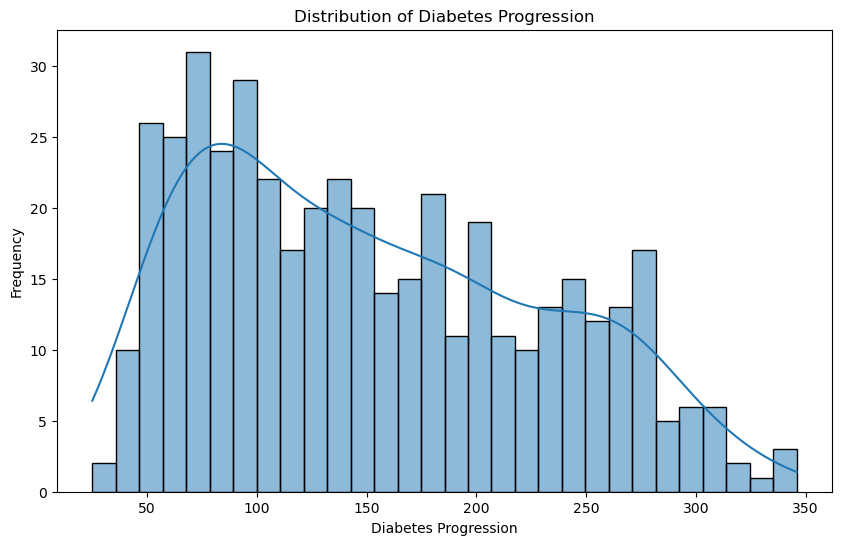

In [61]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Diabetes Progression')
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')
plt.show()

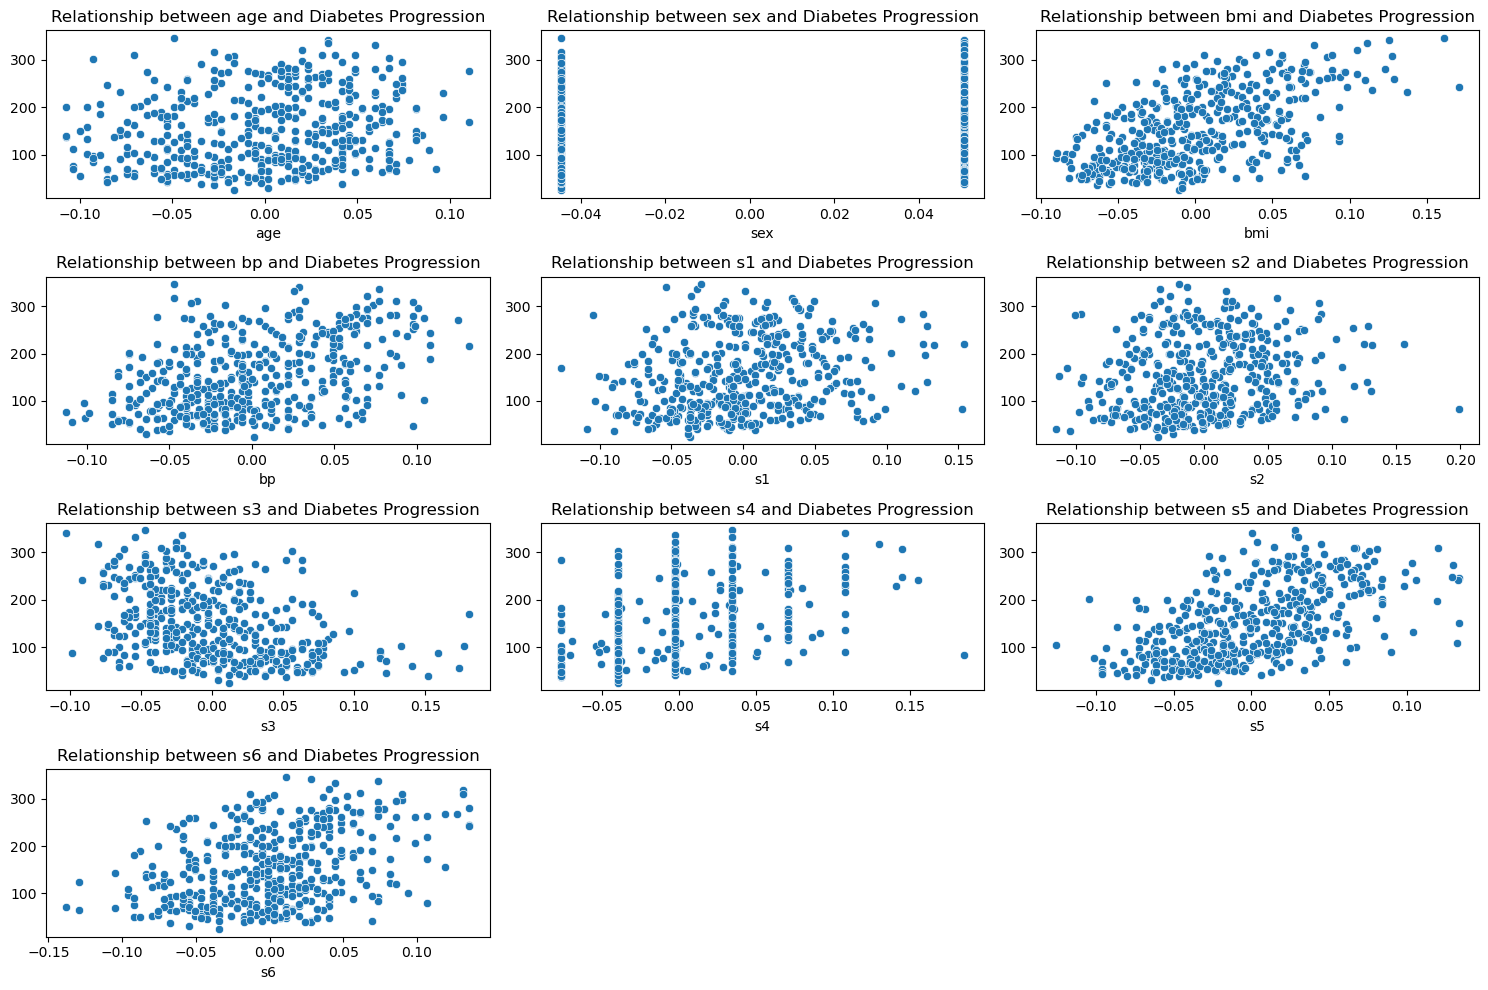

In [62]:
# Visualizing relationships between features and the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=X[col], y=y)
    plt.title(f'Relationship between {col} and Diabetes Progression')
plt.tight_layout()
plt.show()

<Axes: >

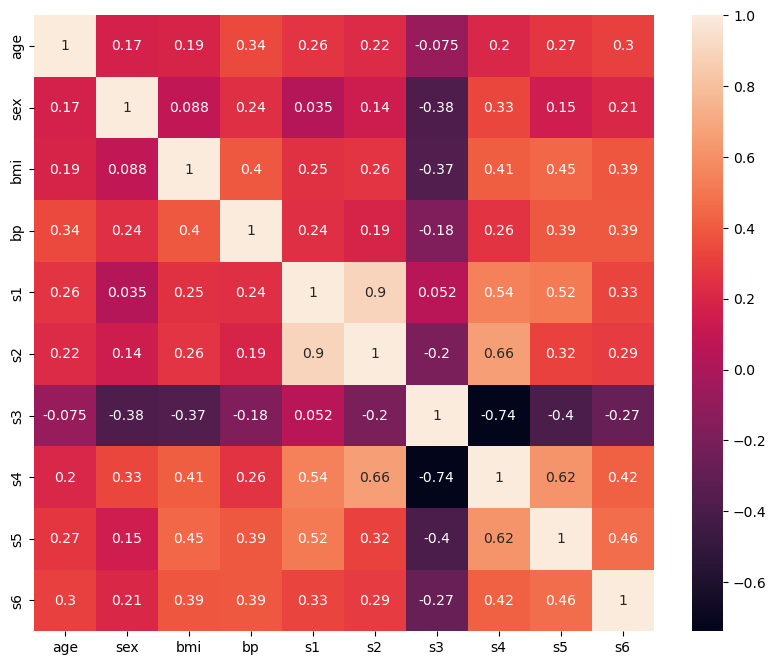

In [63]:
# Visualizing the heatmap of the correlation matrix with annotations
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(X_scaled.corr(), annot=True, ax=ax)

In [64]:
## Building the ANN Model

In [65]:
# Define the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

C:\Users\vinil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [67]:
## Training the ANN Model

In [68]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [69]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 25397.5898 - val_loss: 27250.5547
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28021.5918 - val_loss: 26832.8438
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28058.2441 - val_loss: 26167.3652
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26621.0547 - val_loss: 25114.0000
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25843.5859 - val_loss: 23543.0898
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25927.2520 - val_loss: 21353.1875
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20383.9805 - val_loss: 18667.8418
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18471.5098 - val_loss: 15618.3008
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12730.5713 - val_loss: 12673.7070
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10697.5352 - val_loss: 10225.5791
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7606.3784

In [70]:
## Evaluating the Model

In [71]:
# Evaluate the model on the testing data
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [72]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [73]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 2813.13
R² Score: 0.47


In [74]:
## Improving the Model

In [75]:
# Experimenting with different architectures or hyperparameters

# Example: Adding more layers and adjusting epochs
model_improved = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

C:\Users\vinil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
# Compile the improved model
model_improved.compile(optimizer='adam', loss='mean_squared_error')

In [77]:
# Train the improved model
history_improved = model_improved.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 31392.2539 - val_loss: 26913.9238
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27052.4609 - val_loss: 24948.2891
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26761.4414 - val_loss: 19460.3125
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18596.6895 - val_loss: 9754.9326
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7272.1958 - val_loss: 4816.3584
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5433.5835 - val_loss: 4573.9165
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4025.8840 - val_loss: 4377.7598
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3959.6238 - val_loss: 4087.3198
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3320.3667 - val_loss: 3929.5261
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3387.8079 - val_loss: 3908.7764
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3194.0623 - val_loss: 

In [78]:
# Evaluate the improved model
y_pred_improved = model_improved.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [79]:
# Calculate new performance metrics
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

In [80]:
print(f'Improved Mean Squared Error: {mse_improved:.2f}')
print(f'Improved R² Score: {r2_improved:.2f}')

Improved Mean Squared Error: 3729.71
Improved R² Score: 0.30
